# HW 5
## Tim Demetriades
### AAI 646 - B - Hong Man
5/13/2022

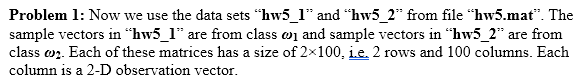

In [1]:
import numpy as np
import scipy.io as io
import matplotlib.pyplot as plt

In [2]:
hw5_1 = io.loadmat('hw5.mat')['hw5_1']
hw5_2 = io.loadmat('hw5.mat')['hw5_2']

In [3]:
class_1_samples = hw5_1.T
class_2_samples = hw5_2.T

In [4]:
X = np.vstack((class_1_samples, class_2_samples))

### Part 1

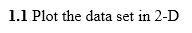

(-6.0, 8.0)

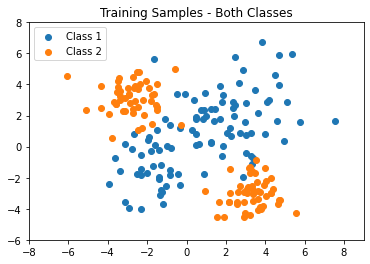

In [5]:
plt.scatter(x = class_1_samples[:, 0], y = class_1_samples[:, 1], label = 'Class 1')
plt.scatter(x = class_2_samples[:, 0], y = class_2_samples[:, 1], label = 'Class 2')
plt.title('Training Samples - Both Classes')
plt.legend()
plt.xlim([-8, 9])
plt.ylim([-6, 8])

### Part 2

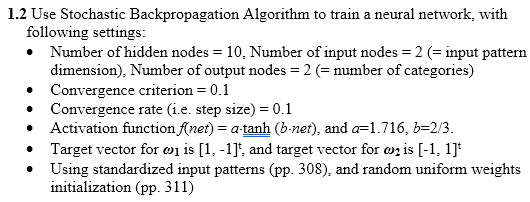

Target matrix is constructed.

In [6]:
Y = np.ones((200, 2)).astype(int)

In [7]:
Y[:100, 1] = Y[:100, 1] * -1    # convert second column of first 100 rows to -1
Y[100:, 0] = Y[100:, 0] * -1    # convert first column of last 100 rows to -1

The training samples (X) are normalized by subtracting the mean from each sample and dividing by the standard devation (actually each sample is divided by the norm which is the equivalent of this).

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
# Standardize input data by remoivng the mean and scaling to unit variance
# Mean = 0, Standard Deviation = 1
StandardScaler = StandardScaler()
X_normalized = StandardScaler.fit_transform(X)

In [10]:
print(f'Mean of X = {round(np.mean(X_normalized))}')
print(f'Standard Deviation of X = {np.std(X_normalized)}')

Mean of X = 0
Standard Deviation of X = 1.0


Some values are set.

In [11]:
theta = 0.1    # stopping criteria
eta = 0.1    # learning rate (step size)
Nh = 10    # number of hidden nodes
Ni = 2    # dimension of input vector = number of input nodes
No = 2    # number of classes = number of output nodes

The weights are initialized.

In [12]:
w_ji = np.random.uniform(low = -1 / np.sqrt(Ni), high = 1 / np.sqrt(Ni), size = (Ni + 1, Nh))    # input to hidden (with bias)
w_kj = np.random.uniform(low = -1 / np.sqrt(Nh), high = 1 / np.sqrt(Nh), size = (Nh + 1, No))    # hidden to output (with bias)
print(w_ji.shape)
print(w_kj.shape)

(3, 10)
(11, 2)


The activation function tanh and its derivative is calculated with the functions below.

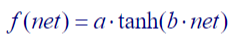

In [13]:
def tanh(x):
    return 1.716 * np.tanh((2 / 3) * x)

In [14]:
def tanh_derivative(x):
    return 1.716 * (2 / 3) * ((1 / np.cosh(2 / 3 * x)) ** 2) 

The loss is calculated with the function below.

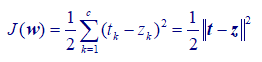

In [15]:
def calc_loss(target, predicted):
    return .5 * np.sum((target - predicted) ** 2)

**Forward Pass**

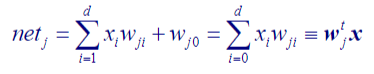

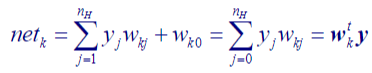

**Back Propagation**

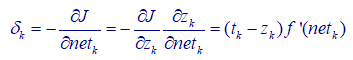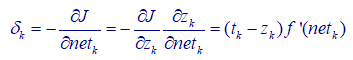

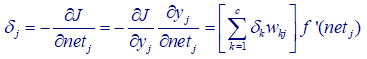

**Update Weights**

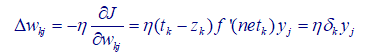

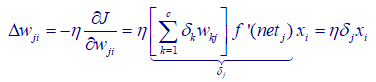

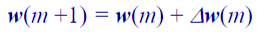

In [16]:
num_iterations = 1000
Jw = [0.001]    # need this to be small but not 0 so we could divide later
iterations = 0

for iter in range(1, num_iterations):
    i = np.random.randint(200)    # choose random sample out of 200 training samples
    
    # Feed Forward
    x = np.concatenate(([1], X_normalized[0])).reshape(3, 1)    # bias
    #net_j = (w_ji.T.reshape(10, 2) @ X_normalized[i].reshape(2, 1))
    net_j = (w_ji.T.reshape(10, 3) @ x.reshape(3, 1))
    #y_j = tanh(net_j)
    y_j = np.concatenate(([1], tanh(net_j.reshape(10))))    # bias
    
    net_k = (w_kj.T.reshape(2, 11) @ y_j.reshape(11, 1))
    z_k = tanh(net_k).reshape(2, 1)
    
    # Back Propagation
    delta_k = (Y[0].reshape(2, 1) - z_k) * tanh_derivative(net_k)
    #delta_j = (w_kj.reshape(10, 2) @ delta_k.reshape(2, 1)) * tanh_derivative(net_j)
    delta_j = (w_kj[:-1, :].reshape(10, 2) @ delta_k.reshape(2, 1)) * tanh_derivative(net_j)    # bias ignored
    
    #delta_w_kj = eta * delta_k.reshape(2, 1) @ y_j.reshape(1, 10)
    delta_w_kj = eta * delta_k.reshape(2, 1) @ y_j.reshape(1, 11)
    #delta_w_ji = eta * delta_j.reshape(10, 1) @ X_normalized[0].reshape(1, 2)
    delta_w_ji = eta * delta_j.reshape(10, 1) @ x.reshape(1, 3)

    # Update weights
    #w_kj = w_kj + delta_w_kj.reshape(10, 2)
    w_kj = w_kj + delta_w_kj.reshape(11, 2)
    #w_ji = w_ji + delta_w_ji.reshape(2, 10)
    w_ji = w_ji + delta_w_ji.reshape(3, 10)
    
    # Calculate loss
    iterations += 1
    Jw.append(0)
    
    for i in range(X.shape[0]):    # iterate over all training samples
        Jw[iterations] = (Jw[iterations] + calc_loss(Y[i].reshape(2, 1), z_k))    # calculate total loss
    Jw[iterations] /= X.shape[0]    # divide total loss by number of training samples
    
    # Stopping criteria
    if np.abs(Jw[iterations] - Jw[iterations - 1]) / Jw[iterations - 1] * 100 < theta:    # if difference in loss is less than theta
        print('Convergence reached.')
        break
    
    if (iterations / 100 == np.floor(iterations / 100)):
        print(f'Iteration: {iterations}, Loss: {Jw[iterations]}')

Convergence reached.


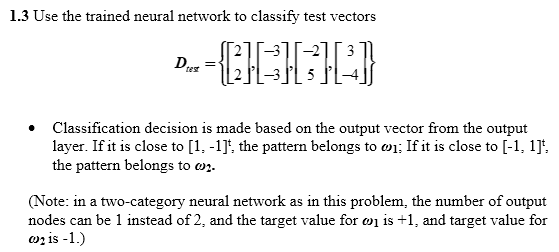

In [17]:
test_set = np.array([[2, 2],
                     [-3, 3], 
                     [-2, 5], 
                     [3, -4]])

In [18]:
# Set classes for test samples
# First 2 samples are class 1, other 2 are class 2
test_target_1 = np.array([1, -1]).reshape(2, 1)
test_target_2 = np.array([-1, 1]).reshape(2, 1)

In [19]:
# Standardize data by remoivng the mean and scaling to unit variance
# Mean = 0, Standard Deviation = 1
test_set_normalized = StandardScaler.fit_transform(test_set)

In [20]:
print(f'Mean of X = {round(np.mean(test_set_normalized))}')
print(f'Standard Deviation of X = {np.std(test_set_normalized)}')

Mean of X = 0
Standard Deviation of X = 0.9999999999999999


In [21]:
prediction_list = []
for i in range(test_set.shape[0]):
    x = np.concatenate(([1], test_set_normalized[i])).reshape(3, 1)    # bias
    net_j = (w_ji.T.reshape(10, 3) @ x.reshape(3, 1))
    y_j = np.concatenate(([1], tanh(net_j.reshape(10))))    # bias
    
    net_k = (w_kj.T.reshape(2, 11) @ y_j.reshape(11, 1))
    z_k = tanh(net_k).reshape(2, 1)
    
    loss_1 = calc_loss(test_target_1, z_k)
    loss_2 = calc_loss(test_target_2, z_k)
    
    if loss_1 > loss_2:
        prediction_list.append('Class 1')
    if loss_1 < loss_2:
        prediction_list.append('Class 2')
        
print(prediction_list)

['Class 2', 'Class 1', 'Class 2', 'Class 2']


The first 2 samples are in Class 1 and the other two are in Class 2.

As can be seen by the predictions above, the neural network was able to correctly predict the class of 3 out of the 4 samples.